<a href="https://colab.research.google.com/github/shripaddhopate/GRIP-TASK/blob/main/Task1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Shripad C. Dhopate
#Task 1 : Prediction of an Student percentages based on number of study hours 

#Importing require Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
data.isnull().sum()


Hours     0
Scores    0
dtype: int64

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Removing outliers

In [ ]:
#********
def outlier_det(data):
  r=[]
  for col in data.columns:
    for i in data.index:
      if data.loc[i,col]=='NULL'or data.loc[i,col]==np.nan:
        r.append(i)
  data= data.drop(list(set(r)))
  data =  data.reset_index()
  data= data.drop('index',axis = 1)


  num_col = []
  for col in  data.columns :
    if data[col].dtype == 'object':
      try:
        data[col] = pd.to_numeric(data[col])
        num_col.append(col)
      except ValueError:
        pass

  count = 0
  t = []
  for i in num_col:
      z = np.abs(stats.zscore(df[i]))
      for j in range(len(z)):
          if z[j]>3 or z[j]<-3:
              t.append(j)
              count+=1
  data = data.drop(list(set(t)))
  data = data.reset_index()
  data = data.drop('index', axis=1)
  print(count)
    
  return data




In [ ]:
data = outlier_det(data)
data

0


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Data Visualization

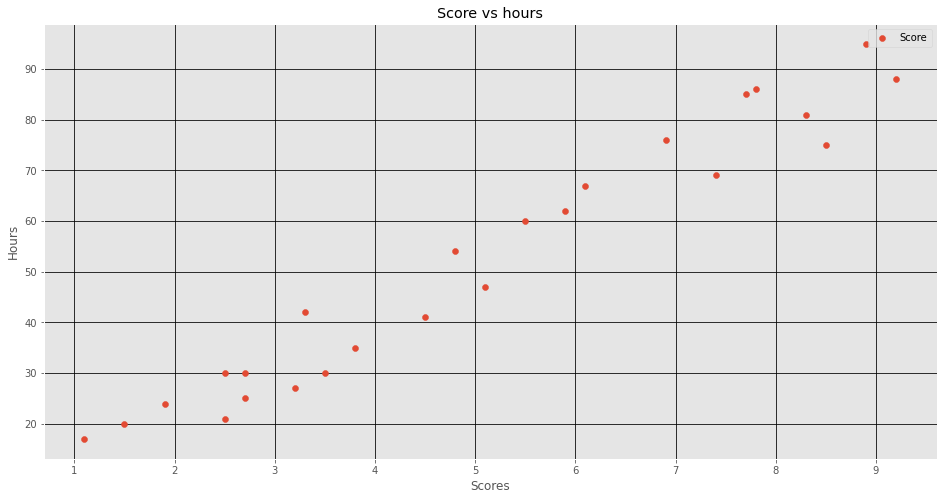

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(data.Hours,data.Scores,label='Score')
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.title('Score vs hours')
style.use('ggplot')
plt.grid(color = 'black')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1152x576 with 0 Axes>

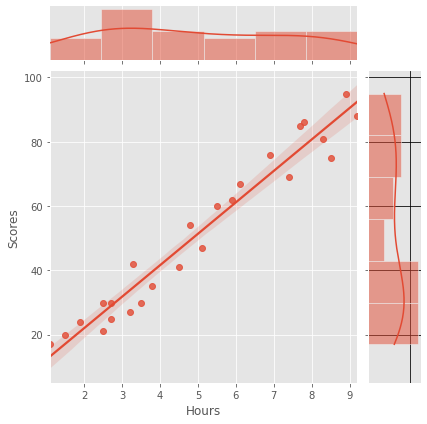

In [ ]:
plt.figure(figsize=(16,8))
sbn.jointplot(data.Hours,data.Scores,kind= 'reg')
plt.grid(color = 'black')
plt.show()

#Prediction of percentages 

In [ ]:
X = data.iloc[:, :1].values  
y = data.iloc[:, 1:2].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                            test_size=0.2, random_state=0) 

In [ ]:
#TRAINING THE MODEL
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

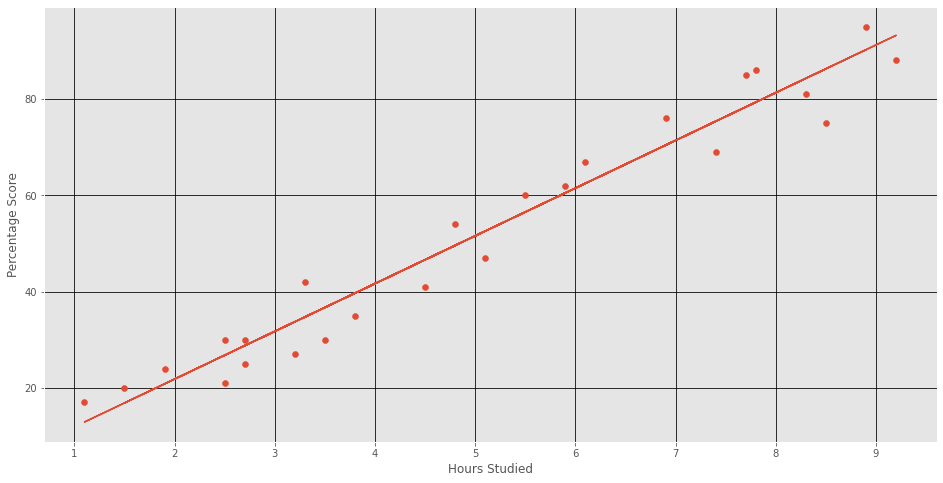

In [ ]:
line = model.coef_*X+model.intercept_
plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid(color = 'black')
plt.show()

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
y_pred = model.predict(X_test)
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score ",own_pred[0],"for",hours,'hours')

The predicted score  [93.69173249] for 9.25 hours


#Evaluating Model

In [ ]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
